# PyTorch Tutorial: How to Develop Deep Learning Models with Python

- The difference between Torch and PyTorch and how to install and confirm PyTorch is working.

- The five-step life-cycle of PyTorch models and how to define, fit, and evaluate models.

- How to develop PyTorch deep learning models for regression, classification, and predictive modeling tasks.

# 1. How to Install PyTorch

## 1.1. What Are Torch and PyTorch?

PyTorch is an open-source Python library for deep learning developed and maintained by Facebook.

The project started in 2016 and quickly became a popular framework among developers and researchers.

Torch (Torch7) is an open-source project for deep learning written in C and generally used via the Lua interface. It was a precursor project to PyTorch and is no longer actively developed. PyTorch includes “Torch” in the name, acknowledging the prior torch library with the “Py” prefix indicating the Python focus of the new project.

# 2. PyTorch Deep Learning Model Life-Cycle

1. Prepare the Data.
2. Define the Model.
3. Train the Model.
4. Evaluate the Model.
5. Make Predictions.

## Step 1: Prepare the Data

A skeleton of a custom Dataset class is provided below.

In [1]:
# class CSVDataset(Dataset):
#     # load the dataset
#     def __init__(self, path):
#         # store the inputs and outputs
#         self.X = ...
#         self.y = ...
 
#     # number of rows in the dataset
#     def __len__(self):
#         return len(self.X)
 
#     # get a row at an index
#     def __getitem__(self, idx):
#         return [self.X[idx], self.y[idx]]

In [2]:
# # create the dataset
# dataset = CSVDataset(...)
# # select rows from the dataset
# train, test = random_split(dataset, [[...], [...]])
# # create a data loader for train and test sets
# train_dl = DataLoader(train, batch_size=32, shuffle=True)
# test_dl = DataLoader(test, batch_size=1024, shuffle=False)

In [3]:
# # train the model
# for i, (inputs, targets) in enumerate(train_dl):

## Step 2: Define the Model

The idiom for defining a model in PyTorch involves defining a class that extends the Module class.

The constructor of your class defines the layers of the model and the forward() function is the override that defines how to forward propagate input through the defined layers of the model.

In [4]:
# # model definition
# class MLP(Module):
#     # define model elements
#     def __init__(self, n_inputs):
#         super(MLP, self).__init__()
#         self.layer = Linear(n_inputs, 1)
#         self.activation = Sigmoid()
 
#     # forward propagate input
#     def forward(self, X):
#         X = self.layer(X)
#         X = self.activation(X)
#         return X

The weights of a given layer can also be initialized after the layer is defined in the constructor.

In [5]:
# xavier_uniform_(self.layer.weight)

## Step 3: Train the Model

In [6]:
# # define the optimization
# criterion = MSELoss()
# optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)

Training the model involves enumerating the DataLoader for the training dataset.

First, a loop is required for the number of training epochs. Then an inner loop is required for the mini-batches for stochastic gradient descent.

In [7]:
# # enumerate epochs
# for epoch in range(100):
#     # enumerate mini batches
#     for i, (inputs, targets) in enumerate(train_dl):

Clearing the last error gradient.

A forward pass of the input through the model.

Calculating the loss for the model output.

Backpropagating the error through the model.

Update the model in an effort to reduce loss.

In [8]:
# # clear the gradients
# optimizer.zero_grad()
# # compute the model output
# yhat = model(inputs)
# # calculate loss
# loss = criterion(yhat, targets)
# # credit assignment
# loss.backward()
# # update model weights
# optimizer.step()

## Step 4: Evaluate the model

Once the model is fit, it can be evaluated on the test dataset.

In [9]:
# for i, (inputs, targets) in enumerate(test_dl):
#     # evaluate the model on the test set
#     yhat = model(inputs)

## Step 5: Make predictions

A fit model can be used to make a prediction on new data.

In [10]:
# # convert row to data
# row = Variable(Tensor([row]).float())
# # make prediction
# yhat = model(row)
# # retrieve numpy array
# yhat = yhat.detach().numpy(

# 3. How to Develop PyTorch Deep Learning Models

## 3.1. How to Develop an MLP for Binary Classification

In [11]:
# pytorch mlp for binary classification
import numpy as np
import pandas as pd
import torch
from torch import nn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils import data
# from numpy import vstack
# from pandas import read_csv
# from torch.utils.data import Dataset
# from torch.utils.data import DataLoader
# from torch.utils.data import random_split
# from torch import Tensor
# from torch.nn import Linear
# from torch.nn import ReLU
# from torch.nn import Sigmoid
# from torch.nn import Module
# from torch.optim import SGD
# from torch.nn import BCELoss
# from torch.nn.init import kaiming_uniform_
# from torch.nn.init import xavier_uniform_

In [12]:
# dataset definition
class CSVDataset(data.Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = pd.read_csv(path, header=None)
        # store the inputs and outputs
        self.X = df.values[:, :-1]
        self.y = df.values[:, -1]
        # ensure input data is floats
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))
 
    # number of rows in the dataset
    def __len__(self):
        return len(self.X)
 
    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]
 
    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return data.random_split(self, [train_size, test_size])

In [13]:
# model definition
class MLP(nn.Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = nn.Linear(n_inputs, 10)
        nn.init.kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = nn.ReLU()
        # second hidden layer
        self.hidden2 = nn.Linear(10, 8)
        nn.init.kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = nn.ReLU()
        # third hidden layer and output
        self.hidden3 = nn.Linear(8, 1)
        nn.init.xavier_uniform_(self.hidden3.weight)
        self.act3 = nn.Sigmoid()
 
    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        X = self.act3(X)
        return X

In [14]:
# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = data.DataLoader(train, batch_size=32, shuffle=True)
    test_dl = data.DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

In [15]:
# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = nn.BCELoss() # Binary Cross Entropy
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

In [16]:
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = np.vstack(predictions), np.vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

In [17]:
# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = torch.Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

In [18]:
# prepare the data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = MLP(34)
# train the model
train_model(train_dl, model)
# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)
# make a single prediction (expect class=1)
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = predict(row, model)
print('Predicted: %.3f (class=%d)' % (yhat, yhat.round()))

235 116
Accuracy: 0.940
Predicted: 0.999 (class=1)


In [19]:
# dataset_outside = CSVDataset(path)
# len(dataset_outside)
# dataset_outside[2]

## 3.2. How to Develop an MLP for Multiclass Classification

In [20]:
# dataset definition
class CSVDataset(data.Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = pd.read_csv(path, header=None)
        # store the inputs and outputs
        self.X = df.values[:, :-1]
        self.y = df.values[:, -1]
        # ensure input data is floats
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype(torch.LongTensor)
 
    # number of rows in the dataset
    def __len__(self):
        return len(self.X)
 
    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]
 
    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return data.random_split(self, [train_size, test_size])

In [21]:
# model definition
class MLP(nn.Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = nn.Linear(n_inputs, 10)
        nn.init.kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = nn.ReLU()
        # second hidden layer
        self.hidden2 = nn.Linear(10, 8)
        nn.init.kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = nn.ReLU()
        # third hidden layer and output
        self.hidden3 = nn.Linear(8, 3)
        nn.init.xavier_uniform_(self.hidden3.weight)
        self.act3 = nn.Softmax(dim=1)
 
    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # output layer
        X = self.hidden3(X)
        X = self.act3(X)
        return X

In [22]:
# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = data.DataLoader(train, batch_size=32, shuffle=True)
    test_dl = data.DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

In [23]:
# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(500):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

In [24]:
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # convert to class labels
        yhat = np.argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = np.vstack(predictions), np.vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

In [25]:
# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = torch.Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

In [26]:
# prepare the data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = MLP(4)
# train the model
train_model(train_dl, model)
# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)
# make a single prediction
row = [5.1,3.5,1.4,0.2]
yhat = predict(row, model)
print('Predicted: %s (class=%d)' % (yhat, np.argmax(yhat)))

100 50
Accuracy: 0.980
Predicted: [[9.9977273e-01 2.2724955e-04 4.3872310e-34]] (class=0)


## 3.3. How to Develop an MLP for Regression

This is a regression problem that involves predicting a single numeric value. As such, the output layer has a single node and uses the default or linear activation function (no activation function). The mean squared error (mse) loss is minimized when fitting the model.

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
# dataset definition
class CSVDataset(data.Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = pd.read_csv(path, header=None)
        # store the inputs and outputs
        self.X = df.values[:, :-1].astype('float32')
        self.y = df.values[:, -1].astype('float32')
        # ensure target has the right shape
        self.y = self.y.reshape((len(self.y), 1))
 
    # number of rows in the dataset
    def __len__(self):
        return len(self.X)
 
    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]
 
    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return data.random_split(self, [train_size, test_size])

In [29]:
# model definition
class MLP(nn.Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = nn.Linear(n_inputs, 10)
        nn.init.xavier_uniform_(self.hidden1.weight)
        self.act1 = nn.Sigmoid()
        # second hidden layer
        self.hidden2 = nn.Linear(10, 8)
        nn.init.xavier_uniform_(self.hidden2.weight)
        self.act2 = nn.Sigmoid()
        # third hidden layer and output
        self.hidden3 = nn.Linear(8, 1)
        nn.init.xavier_uniform_(self.hidden3.weight)
 
    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        return X

In [30]:
# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = data.DataLoader(train, batch_size=32, shuffle=True)
    test_dl = data.DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

In [31]:
# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

In [32]:
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = np.vstack(predictions), np.vstack(actuals)
    # calculate mse
    mse = mean_squared_error(actuals, predictions)
    return mse

In [33]:
# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = torch.Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

In [34]:
# prepare the data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = MLP(13)
# train the model
train_model(train_dl, model)
# evaluate the model
mse = evaluate_model(test_dl, model)
print('MSE: %.3f, RMSE: %.3f' % (mse, np.sqrt(mse)))
# make a single prediction (expect class=1)
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = predict(row, model)
print('Predicted: %.3f' % yhat)

339 167
MSE: 93.229, RMSE: 9.656
Predicted: 20.667


## 3.4. How to Develop a CNN for Image Classification

In [35]:
# load mnist dataset in pytorch
# from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import Compose
from torchvision.transforms import ToTensor
from torchvision.transforms import Normalize
# from matplotlib import pyplot
import matplotlib.pyplot as plt

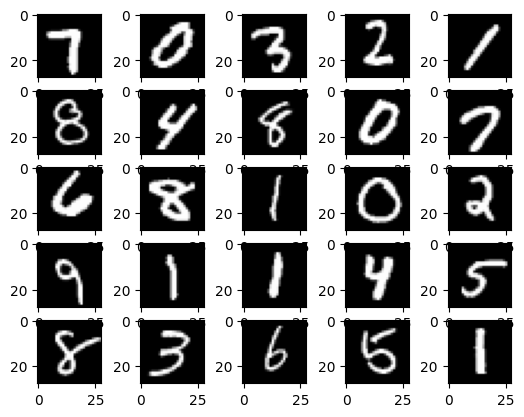

In [36]:
# define location to save or load the dataset
path = '~/.torch/datasets/mnist'
# define the transforms to apply to the data
trans = Compose([ToTensor()])
# download and define the datasets
train = MNIST(path, train=True, download=True, transform=trans)
test = MNIST(path, train=False, download=True, transform=trans)
# define how to enumerate the datasets
train_dl = data.DataLoader(train, batch_size=32, shuffle=True)
test_dl = data.DataLoader(test, batch_size=32, shuffle=True)
# get one batch of images
i, (inputs, targets) = next(enumerate(train_dl))
# plot some images
for i in range(25):
 # define subplot
 plt.subplot(5, 5, i+1)
 # plot raw pixel data
 plt.imshow(inputs[i][0], cmap='gray')
# show the figure
plt.show()

In [37]:
# model definition
class CNN(nn.Module):
    # define model elements
    def __init__(self, n_channels):
        super(CNN, self).__init__()
        # input to first hidden layer
        self.hidden1 = nn.Conv2d(n_channels, 32, (3,3))
        nn.init.kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = nn.ReLU()
        # first pooling layer
        self.pool1 = nn.MaxPool2d((2,2), stride=(2,2))
        # second hidden layer
        self.hidden2 = nn.Conv2d(32, 32, (3,3))
        nn.init.kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = nn.ReLU()
        # second pooling layer
        self.pool2 = nn.MaxPool2d((2,2), stride=(2,2))
        # fully connected layer
        self.hidden3 = nn.Linear(5*5*32, 100)
        nn.init.kaiming_uniform_(self.hidden3.weight, nonlinearity='relu')
        self.act3 = nn.ReLU()
        # output layer
        self.hidden4 = nn.Linear(100, 10)
        nn.init.xavier_uniform_(self.hidden4.weight)
        self.act4 = nn.Softmax(dim=1)
 
    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.pool1(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.pool2(X)
        # flatten
        X = X.view(-1, 4*4*50)
        # third hidden layer
        X = self.hidden3(X)
        X = self.act3(X)
        # output layer
        X = self.hidden4(X)
        X = self.act4(X)
        return X

In [38]:
# prepare the dataset
def prepare_data(path):
    # define standardization
    trans = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))])
    # load dataset
    train = MNIST(path, train=True, download=True, transform=trans)
    test = MNIST(path, train=False, download=True, transform=trans)
    # prepare data loaders
    train_dl = data.DataLoader(train, batch_size=64, shuffle=True)
    test_dl = data.DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

In [39]:
# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(10):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

In [40]:
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # convert to class labels
        yhat = np.argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = np.vstack(predictions), np.vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

In [41]:
# prepare the data
path = '~/.torch/datasets/mnist'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = CNN(1)
# # train the model
train_model(train_dl, model)
# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)

60000 10000
Accuracy: 0.989


## 3.5. A Beginner’s Guide on Recurrent Neural Networks with PyTorch

In [1]:
import torch
from torch import nn

import numpy as np

In [2]:
text = ['hey how are you','good i am fine','have a nice day']

# Join all the sentences together and extract the unique characters from the combined sentences
chars = set(''.join(text))

# Creating a dictionary that maps integers to the characters
int2char = dict(enumerate(chars))

# Creating another dictionary that maps characters to integers
char2int = {char: ind for ind, char in int2char.items()}

In [5]:
# Finding the length of the longest string in our data
maxlen = len(max(text, key=len))

# Padding
# A simple loop that loops through the list of sentences and adds a ' ' whitespace until the length of
# the sentence matches the length of the longest sentence
for i in range(len(text)):
  while len(text[i])<maxlen:
      text[i] += ' '

In [24]:
# Creating lists that will hold our input and target sequences
input_seq = []
target_seq = []

for i in range(len(text)):
    # Remove last character for input sequence
    input_seq.append(text[i][:-1])
    
    # Remove first character for target sequence
    target_seq.append(text[i][1:])
    print("Input Sequence: {}\nTarget Sequence: {}".format(input_seq[i], target_seq[i]))

Input Sequence: hey how are yo
Target Sequence: ey how are you
Input Sequence: good i am fine
Target Sequence: ood i am fine 
Input Sequence: have a nice da
Target Sequence: ave a nice day


In [25]:
for i in range(len(text)):
    input_seq[i] = [char2int[character] for character in input_seq[i]]
    target_seq[i] = [char2int[character] for character in target_seq[i]]

Before encoding our input sequence into one-hot vectors, we'll define 3 key variables:

- dict_size: Dictionary size - The number of unique characters that we have in our text. This will determine the one-hot vector size as each character will have an assigned index in that vector
- seq_len: The length of the sequences that we're feeding into the model. As we standardized the length of all our sentences to be equal to the longest sentences, this value will be the max length - 1 as we removed the last character input as well
- batch_size: The number of sentences that we defined and are going to feed into the model as a batch


In [26]:
dict_size = len(char2int)
seq_len = maxlen - 1
batch_size = len(text)

def one_hot_encode(sequence, dict_size, seq_len, batch_size):
    # Creating a multi-dimensional array of zeros with the desired output shape
    features = np.zeros((batch_size, seq_len, dict_size), dtype=np.float32)
    
    # Replacing the 0 at the relevant character index with a 1 to represent that character
    for i in range(batch_size):
        for u in range(seq_len):
            features[i, u, sequence[i][u]] = 1
    return features

In [30]:
# Input shape --> (Batch Size, Sequence Length, One-Hot Encoding Size)
input_seq = one_hot_encode(input_seq, dict_size, seq_len, batch_size)

In [31]:
input_seq = torch.from_numpy(input_seq)
target_seq = torch.Tensor(target_seq)

In [32]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [33]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)

        # Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden

In [34]:
# Instantiate the model with hyperparameters
model = Model(input_size=dict_size, output_size=dict_size, hidden_dim=12, n_layers=1)
# We'll also set the model to the device that we defined earlier (default is CPU)
model.to(device)

# Define hyperparameters
n_epochs = 100
lr=0.01

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [35]:
# Training Run
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() # Clears existing gradients from previous epoch
    input_seq.to(device)
    output, hidden = model(input_seq)
    loss = criterion(output, target_seq.view(-1).long())
    loss.backward() # Does backpropagation and calculates gradients
    optimizer.step() # Updates the weights accordingly
    
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100............. Loss: 2.4188
Epoch: 20/100............. Loss: 2.1974
Epoch: 30/100............. Loss: 1.8694
Epoch: 40/100............. Loss: 1.4432
Epoch: 50/100............. Loss: 1.0305
Epoch: 60/100............. Loss: 0.7160
Epoch: 70/100............. Loss: 0.4998
Epoch: 80/100............. Loss: 0.3587
Epoch: 90/100............. Loss: 0.2661
Epoch: 100/100............. Loss: 0.2026


In [36]:
# This function takes in the model and character as arguments and returns the next character prediction and hidden state
def predict(model, character):
    # One-hot encoding our input to fit into the model
    character = np.array([[char2int[c] for c in character]])
    character = one_hot_encode(character, dict_size, character.shape[1], 1)
    character = torch.from_numpy(character)
    character.to(device)
    
    out, hidden = model(character)

    prob = nn.functional.softmax(out[-1], dim=0).data
    # Taking the class with the highest probability score from the output
    char_ind = torch.max(prob, dim=0)[1].item()

    return int2char[char_ind], hidden

In [37]:
# This function takes the desired output length and input characters as arguments, returning the produced sentence
def sample(model, out_len, start='hey'):
    model.eval() # eval mode
    start = start.lower()
    # First off, run through the starting characters
    chars = [ch for ch in start]
    size = out_len - len(chars)
    # Now pass in the previous characters and get a new one
    for ii in range(size):
        char, h = predict(model, chars)
        chars.append(char)

    return ''.join(chars)

In [38]:
sample(model, 15, 'good')

'good i am fine '

Ref:

[PyTorch Tutorial: How to Develop Deep Learning Models with Python](https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/)

[A Beginner’s Guide on Recurrent Neural Networks with PyTorch](https://blog.floydhub.com/a-beginners-guide-on-recurrent-neural-networks-with-pytorch/)